In [3]:
import cv2
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

from scipy import ndimage
from scipy.ndimage import gaussian_filter
from skimage import color

## 2. Texture Modeling

## 2.1 Filterbank

In order to analyze texture, we would like to describe the
image in terms of distributions of filter outputs.  Implement a filter bank
function which takes an image as input and filters the image with Gaussian
derivatives in the horizontal and vertical directions at 3 different scales
${\sigma = 1,2,4}$.  Also create an additional center surround filter by taking
the different of two isotropic Gaussian functions at two different scales, e.g.
$G_2(x,y)-G_1(x,y)$ and $G_4(x,y) - G_2(x,y)$.

Your filterbank function should take as input one grayscale image and return 8
filter response images.

### Implementation

In [4]:
def filterbank(image, sigmas):
    filter_responses = []
    gaussian_responses = []
    
    for sigma in sigmas:
        filtered_image_xaxis =  gaussian_filter(image, sigma, order=(0,1))
        filter_responses.append(filtered_image_xaxis)
        filtered_image_yaxis =  gaussian_filter(image, sigma, order=(1,0))
        filter_responses.append(filtered_image_yaxis)
        
        gaussian_responses.append(gaussian_filter(image,sigma))
        
    filter_responses.append(gaussian_responses[1]-gaussian_responses[0]) #I*(G2-G1) = I*G2 - I*G1
    filter_responses.append(gaussian_responses[2]-gaussian_responses[1]) #I*(G4-G2) = I*G4 - I*G2
    
    assert len(filter_responses)==8
    
    return filter_responses        

### Visualization

Visualize the kernels of your 8 filters as images using a pseudocolor colormap.  Also visualize the result of applying your filterbank to a test image

In [5]:
sigmas = [1,2,4]

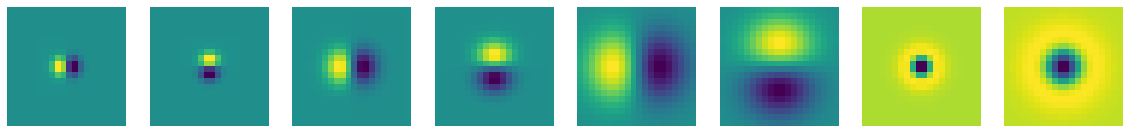

In [12]:
# delta
delta = np.zeros(shape=(200,200))
delta[99:101,99:101] = 1

# impulse response = filter_kernels
filter_kernels = filterbank(delta, sigmas)

plt.figure(figsize=(20,10))
for i in range(len(filter_kernels)):
    plt.subplot(1,8,i+1)
    plt.axis('off')
    plt.imshow(filter_kernels[i][90:110,90:110], cmap='viridis')
    
plt.show()

1. Gaussian derivative with sigma 1, along x-axis
2. Gaussian derivative with sigma 1, along y-axis
3. Gaussian derivative with sigma 2, along x-axis
4. Gaussian derivative with sigma 2, along y-axis
5. Gaussian derivative with sigma 4, along x-axis
6. Gaussian derivative with sigma 4, along y-axis
7. G2-G1
8. G4-G2

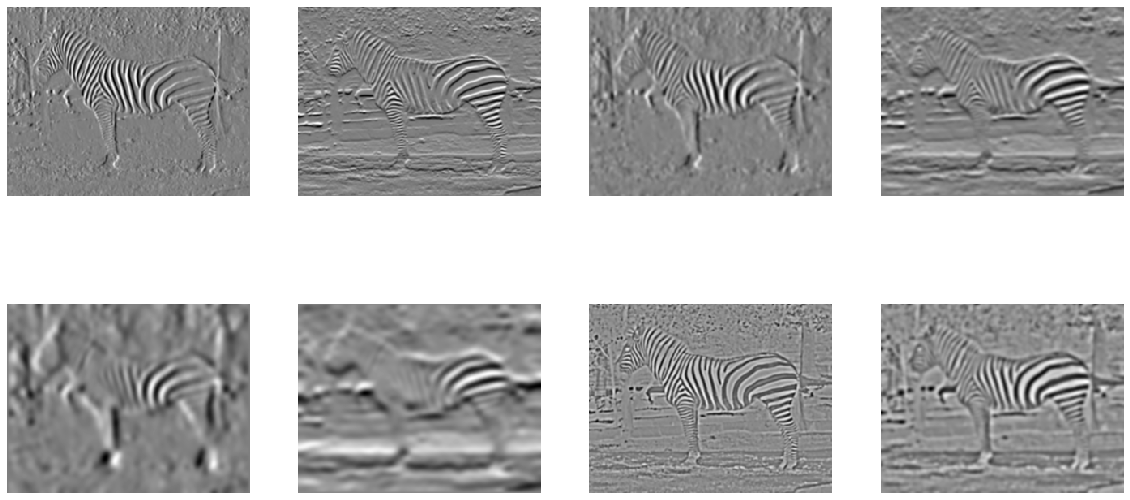

In [13]:
image = plt.imread('zebra_small.jpg')
image_grayscale = color.rgb2gray(image)

filterbank_response = filterbank(image_grayscale, sigmas)

plt.figure(figsize=(20,10))
for i in range(len(filterbank_response)):
    plt.subplot(2,4,i+1)
    plt.axis('off')
    plt.imshow(filterbank_response[i], cmap='gray')
    
plt.show()

## 2.2 Texture Analysis

Convince yourself that the distribution of filter outputs really captures
something about the texture.  You can use the **zebra_small.jpg** image.

Select a image patch (say 40x40 pixels) over the zebra's neck and compute the
mean absolute response of each of the 8 filter responses over that region 
(if you don't take an absolute value then the positive and negative
components will tend to cancel out and give you mean 0).  Compute the mean
absolute responses of the filterbank channels for similar regions in the tree
leaves above the zebra's back and also on the grass in front of the zebra.

Visualize (e.g., using the **plt.bar** function) the three mean
response vectors for these regions and explain the differences you see in terms
of your filters.  

Important Note: you may need to experiment with resizing
image to find the best scale at which to capture the texture. In your writeup,
explain how you chose the scale.

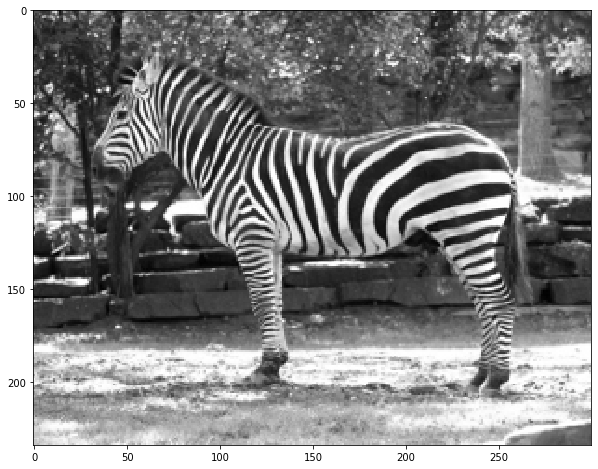

In [6]:
plt.figure(figsize=(10,10))
plt.imshow(image_grayscale, cmap='gray')

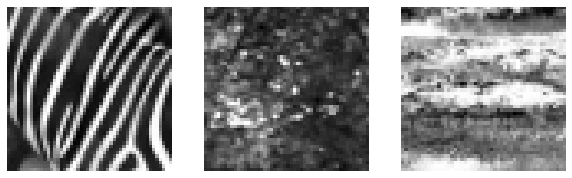

In [7]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.axis('off')
neck = image_grayscale[50:100,75:125]
plt.imshow(neck, cmap='gray')

plt.subplot(1,3,2)
plt.axis('off')
leaves = image_grayscale[0:50,125:175]
plt.imshow(leaves, cmap='gray')

plt.subplot(1,3,3)
plt.axis('off')
grass = image_grayscale[175:225,0:50]
plt.imshow(grass, cmap='gray')

<BarContainer object of 8 artists>

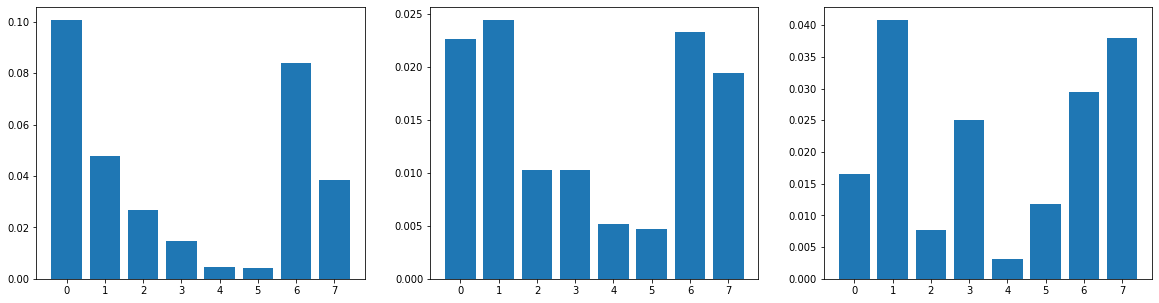

In [8]:
neck_responses = filterbank(neck, sigmas)
mean_neck = np.zeros(shape=len(neck_responses))
for i in range(len(neck_responses)):
    mean_neck[i] = np.mean(np.abs(neck_responses[i]))

leaves_responses = filterbank(leaves, sigmas)
mean_leaves = np.zeros(shape=len(leaves_responses))
for i in range(len(leaves_responses)):
    mean_leaves[i] = np.mean(np.abs(leaves_responses[i]))

grass_responses = filterbank(grass, sigmas)
mean_grass = np.zeros(shape=len(grass_responses))
for i in range(len(grass_responses)):
    mean_grass[i] = np.mean(np.abs(grass_responses[i]))
    
x = np.arange(8)    

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.bar(x, mean_neck)
plt.subplot(1,3,2)
plt.bar(x, mean_leaves)
plt.subplot(1,3,3)
plt.bar(x, mean_grass)

The three plots above respectively correspond to the neck, leaves, and the grass patches. The corresponding filters are
0. Gaussian derivative with sigma 1, along x-axis
1. Gaussian derivative with sigma 1, along y-axis
2. Gaussian derivative with sigma 2, along x-axis
3. Gaussian derivative with sigma 2, along y-axis
4. Gaussian derivative with sigma 4, along x-axis
5. Gaussian derivative with sigma 4, along y-axis
6. G2-G1
7. G4-G2

Ideally, bars of 0,2,4 and 1,3,5 should be in decreasing order. These groups of 3 are essentially the same type of filter but with wider sigmas. Same applies for 6 and 7. However, we see that the trend is reversed in the grass image for filters 6 and 7. This might be due to the bigger patches of irregularities caused due to the uneven lighting in the scene.

Next, we see that the stripes on the zebra's neck are mostly vertical. So the mean of filter taking derivative along X-axis should be much higher than corresponding filter (with same sigma) along the Y-axis. This is trend is seen in the first bar graph. Vice versa, in the grass patch, the irregularities are horizontal and hence the derivatives along Y-axis are much higher compared to corresponding filters along the X-axis. The texture of leaves is more or less symmetric is both directions, so the average of the corresponding filters are comparable.